In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

In [20]:
plt.rcParams['figure.dpi'] = 100

In [6]:
# load the data
filePath = "\\Glass.csv"
df = pd.read_csv(filePath)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 80 20 splitt and standardizing data
# stratify to balance labels in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(array([14., 15.,  0.,  3.,  0.,  0.,  3.,  0.,  2.,  6.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

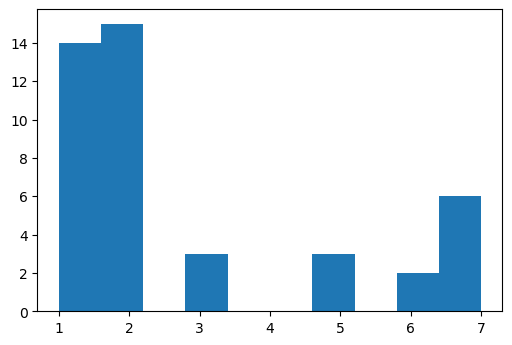

In [22]:
plt.hist(y_test)

(array([56., 61.,  0., 14.,  0.,  0., 10.,  0.,  7., 23.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

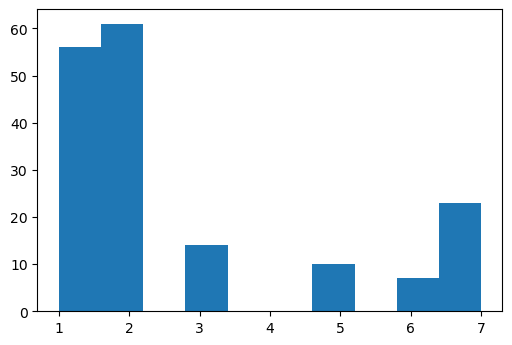

In [23]:
plt.hist(y_train)

## One-Vs-Rest Logistic Regression

### Training Set

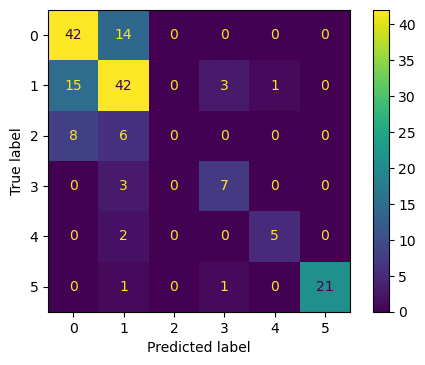

Model Accuracy = 0.6842105263157895


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

lr_glass = LogisticRegression(multi_class='ovr')
lr_glass.fit(X_train, y_train)
y_pred = lr_glass.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

print(f'Model Accuracy = {accuracy_score(y_train, y_pred)}')

### Test Set

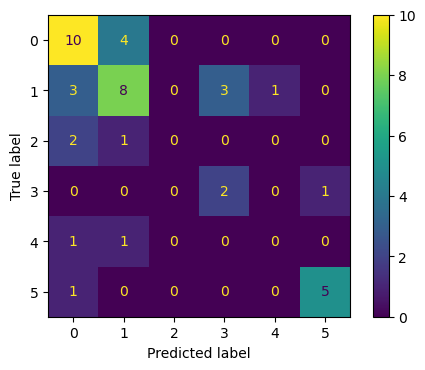

Validation Accuracy = 0.5813953488372093


In [29]:
predictions = lr_glass.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

print(f'Validation Accuracy = {accuracy_score(y_test, predictions)}')

## Decision Tree

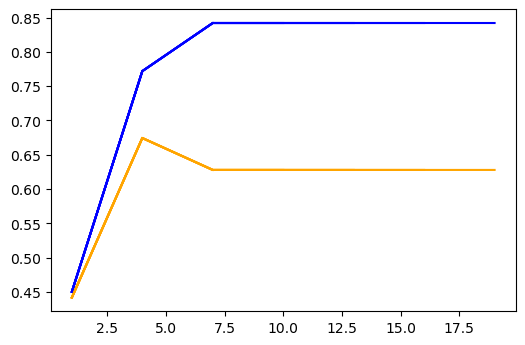

In [261]:
# finding the hyperparameters to avoid overfitting
max_depth = np.arange(1, 22, 3)
result_dic = {
    "max_depth": [],
    "train_acc": [],
    "test_acc": []
}
for depth in max_depth:
    
    dtree_model = DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=depth,
                                                 min_samples_leaf=5,
                                                 random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_train)  
    predictions = dtree_model.predict(X_test)  
    
    train_acc = accuracy_score(y_train, y_pred)
    test_acc = accuracy_score(y_test, predictions)
    
    result_dic['max_depth'].append(depth)
    result_dic['train_acc'].append(train_acc)
    result_dic['test_acc'].append(test_acc)
    
    plt.plot(result_dic['max_depth'], result_dic['train_acc'], c='blue')
    plt.plot(result_dic['max_depth'], result_dic['test_acc'], c='orange')

In [266]:
# using the best parameters
dtree_model = DecisionTreeClassifier(criterion='entropy',
                                             max_depth=4,
                                             min_samples_leaf=5,
                                             random_state=1)

dtree_model.fit(X_train, y_train)
y_pred = dtree_model.predict(X_train)  
predictions = dtree_model.predict(X_test)  

print(f'Training Accuracy = {accuracy_score(y_train, y_pred)}')
print(f'Validation Accuracy = {accuracy_score(y_test, predictions)}')

Training Accuracy = 0.7719298245614035
Validation Accuracy = 0.6744186046511628


## Random Forest

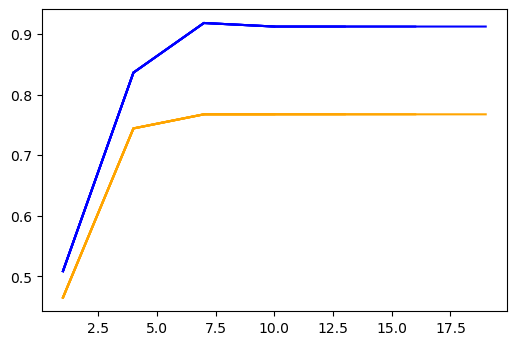

In [290]:
from sklearn.ensemble import RandomForestClassifier

# finding the hyperparameters to avoid overfitting
max_depth = np.arange(1, 22, 3)
result_dic = {
    "max_depth": [],
    "train_acc": [],
    "test_acc": []
}
for depth in max_depth:
    
    rf_model = RandomForestClassifier(n_estimators=50,
                                         criterion='entropy',
                                         max_depth=depth,
                                         min_samples_leaf=4,
                                         random_state=1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_train)  
    predictions = rf_model.predict(X_test)  
    
    train_acc = accuracy_score(y_train, y_pred)
    test_acc = accuracy_score(y_test, predictions)
    
    result_dic['max_depth'].append(depth)
    result_dic['train_acc'].append(train_acc)
    result_dic['test_acc'].append(test_acc)
    
    plt.plot(result_dic['max_depth'], result_dic['train_acc'], c='blue')
    plt.plot(result_dic['max_depth'], result_dic['test_acc'], c='orange')

In [291]:
# using the best parameters
rf_model = RandomForestClassifier(n_estimators=50,
                                     criterion='entropy',
                                     max_depth=4,
                                     min_samples_leaf=4,
                                     random_state=1)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_train)  
predictions = rf_model.predict(X_test)  

print(f'Training Accuracy = {accuracy_score(y_train, y_pred)}')
print(f'Validation Accuracy = {accuracy_score(y_test, predictions)}')

Training Accuracy = 0.8362573099415205
Validation Accuracy = 0.7441860465116279


# k-fold Cross Validation

## One-Vs-Rest Logistic Regression

In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
lr_glass = LogisticRegression(multi_class='ovr')
# evaluate model
scores = cross_val_score(lr_glass, X_std, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(f'Accuracy = ({np.mean(scores)}, {np.std(scores)})')

Accuracy = (0.6450719822812847, 0.07169035274719537)


## Decision Tree

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

dtree_cv = DecisionTreeClassifier(criterion='entropy', random_state=1)
grid_cv = GridSearchCV(dtree_cv, param_grid, scoring="accuracy", n_jobs=-1, cv=5).fit(X_std, y)

print("Param for GridSearch", grid_cv.best_params_)
print("Accuracy Score for GridSearch: ", accuracy_score(y, grid_cv.predict(X_std)))

Param for GridSearch {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy Score for GridSearch:  0.8551401869158879


## Random Forest

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    "n_estimators": [10, 30, 50, 70, 100],
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

rf_cv = RandomForestClassifier(criterion='entropy', random_state=1)
grid_cv = GridSearchCV(rf_cv, param_grid, scoring="accuracy", n_jobs=-1, cv=5).fit(X_std, y)

print("Param for GridSearch", grid_cv.best_params_)
print("Accuracy Score for GridSearch: ", accuracy_score(y, grid_cv.predict(X_std)))

Param for GridSearch {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy Score for GridSearch:  0.985981308411215
